# Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.


# Attribute Information

1- Age: age of the patient [years]

2- Sex: sex of the patient [M: Male, F: Female]

3- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

4- RestingBP: resting blood pressure [mm Hg]

5- Cholesterol: serum cholesterol [mm/dl]

6- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

7- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

8- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

9-ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

10- Oldpeak: oldpeak = ST [Numeric value measured in depression]

11- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

12- HeartDisease: output class [1: heart disease, 0: Normal]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [ ]:
heart = pd.read_csv('https://raw.githubusercontent.com/EslinLeiva/Data-Wrangling-and-Machine-Learning/main/heart.csv')

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
print(heart.nunique())

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64


In [ ]:
X = heart.drop(['HeartDisease'], axis=1)

In [ ]:
y = heart['HeartDisease']

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 668 to 451
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                184 non-null    int64  
 1   RestingBP          184 non-null    int64  
 2   Cholesterol        184 non-null    int64  
 3   FastingBS          184 non-null    int64  
 4   MaxHR              184 non-null    int64  
 5   Oldpeak            184 non-null    float64
 6   Sex_F              184 non-null    uint8  
 7   Sex_M              184 non-null    uint8  
 8   ChestPainType_ASY  184 non-null    uint8  
 9   ChestPainType_ATA  184 non-null    uint8  
 10  ChestPainType_NAP  184 non-null    uint8  
 11  ChestPainType_TA   184 non-null    uint8  
 12  RestingECG_LVH     184 non-null    uint8  
 13  RestingECG_Normal  184 non-null    uint8  
 14  RestingECG_ST      184 non-null    uint8  
 15  ExerciseAngina_N   184 non-null    uint8  
 16  ExerciseAngina_Y   184 n

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('SGD', SGDClassifier()))
models.append(('Ridge', RidgeClassifier()))
models.append(('PAC', PassiveAggressiveClassifier()))
models.append(('Perceptron', Perceptron()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NearestCentroid', NearestCentroid()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('ExtraTree', ExtraTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('BNB', BernoulliNB()))
# models.append(('ComplementNB', ComplementNB()))
# models.append(('MultinomialNB', MultinomialNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('NuSVC', NuSVC()))
models.append(('LinearSVC', LinearSVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('ExtraTrees', ExtraTreesClassifier()))
models.append(('Bagging', BaggingClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')))

LR: 0.865087 (0.025668)
Score for each of the 10 K-fold tests:  [0.86486486 0.90540541 0.86486486 0.85135135 0.80821918 0.89041096
 0.8630137  0.89041096 0.8630137  0.84931507]
LogisticRegression(solver='liblinear')
	Training time: 0.021s
	Prediction time: 0.160s

SGD: 0.658515 (0.099832)
Score for each of the 10 K-fold tests:  [0.52702703 0.52702703 0.52702703 0.7027027  0.7260274  0.79452055
 0.67123288 0.78082192 0.7260274  0.60273973]
SGDClassifier()
	Training time: 0.034s
	Prediction time: 0.249s

Ridge: 0.865087 (0.025668)
Score for each of the 10 K-fold tests:  [0.89189189 0.89189189 0.85135135 0.85135135 0.82191781 0.90410959
 0.84931507 0.89041096 0.84931507 0.84931507]
RidgeClassifier()
	Training time: 0.047s
	Prediction time: 0.147s

PAC: 0.599482 (0.076543)
Score for each of the 10 K-fold tests:  [0.7027027  0.52702703 0.59459459 0.55405405 0.5890411  0.50684932
 0.64383562 0.52054795 0.75342466 0.60273973]
PassiveAggressiveClassifier()
	Training time: 0.008s
	Prediction ti

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

QDA: 0.697242 (0.101872)
Score for each of the 10 K-fold tests:  [0.74324324 0.7972973  0.75675676 0.71621622 0.50684932 0.75342466
 0.63013699 0.52054795 0.75342466 0.79452055]
QuadraticDiscriminantAnalysis()
	Training time: 0.027s
	Prediction time: 0.124s

KNN: 0.697631 (0.049328)
Score for each of the 10 K-fold tests:  [0.77027027 0.66216216 0.58108108 0.71621622 0.69863014 0.68493151
 0.73972603 0.69863014 0.73972603 0.68493151]
KNeighborsClassifier()
	Training time: 0.004s
	Prediction time: 0.175s

NearestCentroid: 0.594095 (0.048203)
Score for each of the 10 K-fold tests:  [0.63513514 0.60810811 0.55405405 0.51351351 0.5890411  0.64383562
 0.5890411  0.65753425 0.63013699 0.52054795]
NearestCentroid()
	Training time: 0.002s
	Prediction time: 0.057s

CART: 0.801277 (0.040487)
Score for each of the 10 K-fold tests:  [0.7972973  0.77027027 0.75675676 0.74324324 0.80821918 0.87671233
 0.78082192 0.8630137  0.80821918 0.80821918]
DecisionTreeClassifier()
	Training time: 0.008s
	Predic

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

LinearSVC: 0.761551 (0.072077)
Score for each of the 10 K-fold tests:  [0.86486486 0.74324324 0.85135135 0.60810811 0.75342466 0.75342466
 0.68493151 0.75342466 0.79452055 0.80821918]
LinearSVC()
	Training time: 0.044s
	Prediction time: 0.500s

RF: 0.866420 (0.031314)
Score for each of the 10 K-fold tests:  [0.89189189 0.89189189 0.85135135 0.87837838 0.79452055 0.84931507
 0.83561644 0.89041096 0.89041096 0.89041096]
RandomForestClassifier()
	Training time: 0.222s
	Prediction time: 2.252s

GB: 0.865124 (0.033045)
Score for each of the 10 K-fold tests:  [0.86486486 0.91891892 0.83783784 0.83783784 0.79452055 0.87671233
 0.8630137  0.89041096 0.87671233 0.89041096]
GradientBoostingClassifier()
	Training time: 0.180s
	Prediction time: 2.193s

ExtraTrees: 0.847464 (0.026197)
Score for each of the 10 K-fold tests:  [0.85135135 0.83783784 0.82432432 0.83783784 0.83561644 0.8630137
 0.83561644 0.87671233 0.90410959 0.80821918]
ExtraTreesClassifier()
	Training time: 0.235s
	Prediction time: 2

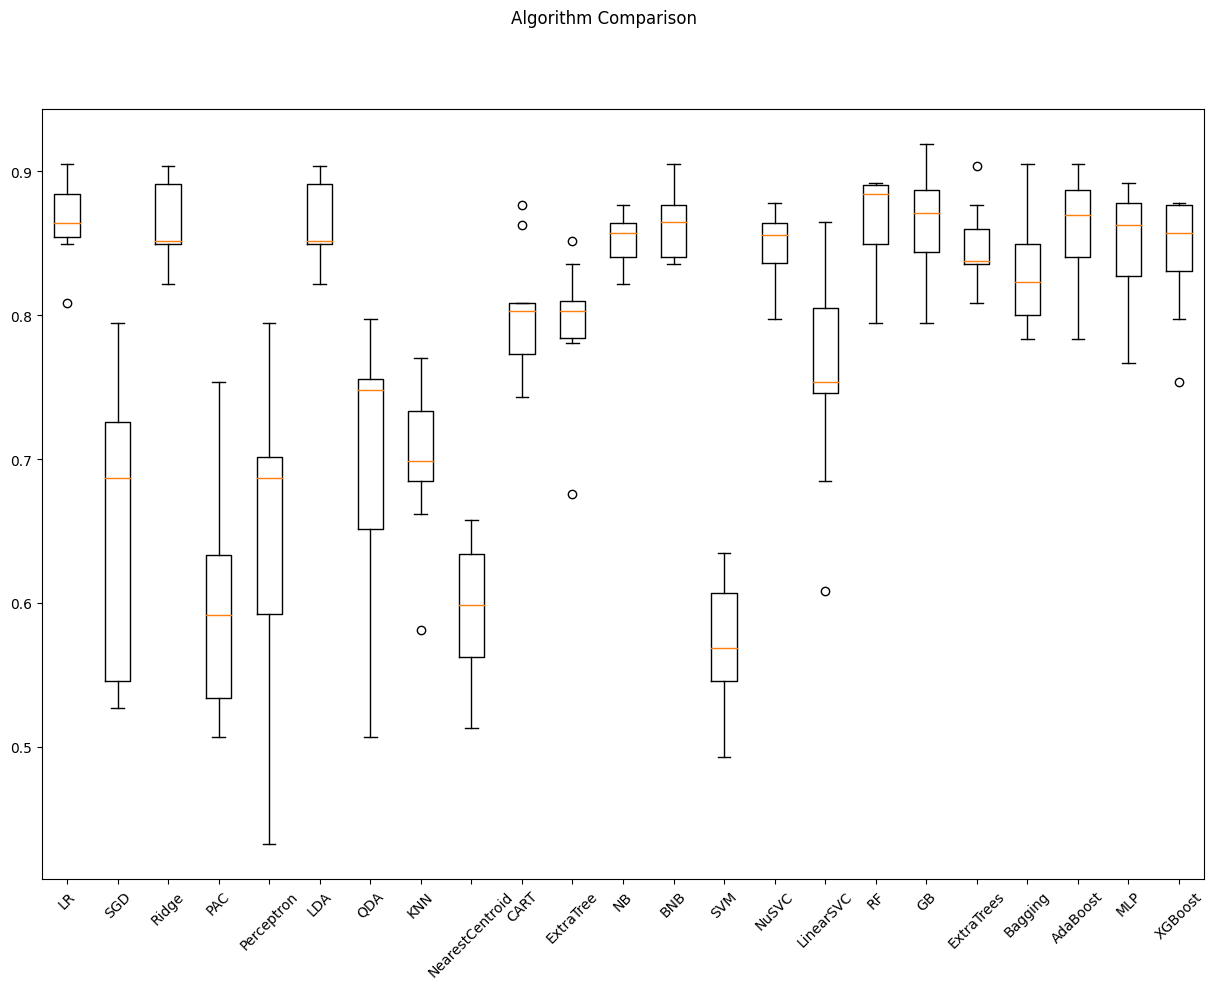

In [ ]:
# Scoring metrics:
# 'accuracy', 'balanced_accuracy', 'average_precision', 'neg_brier_score', 'f1', 'f1_micro', 'f1_macro', 'f1_weighted',
# 'neg_log_loss', 'precision', 'recall', 'jaccard', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted'
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, y_train)
    train_time = time() - start
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    predict_time = time() - start
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print("Score for each of the 10 K-fold tests: ",cv_results)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print()

fig = pyplot.figure(figsize=(15, 10))  # Change the numbers as needed
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names, rotation = 45)  # Added rotation for better visibility
pyplot.show()

In [ ]:
heart_dummies = pd.get_dummies(heart[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']])